In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\Ali\Machine Learning\Decision Tree


In [4]:
cancer = pd.read_csv(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/KNN.csv')

In [5]:
del cancer['id']
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


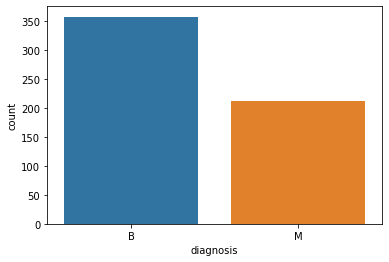

In [6]:
import seaborn as sns
sns.countplot(cancer['diagnosis'])

In [7]:
X = cancer.iloc[:,1:]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [8]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis          569 non-null    object 
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [9]:
pd.set_option('precision',1)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.3,12.4,78.8,464.1,1.0e-01,7.0e-02,4.0e-02,3.7e-02,0.2,...,13.5,15.6,87.0,549.1,0.1,0.1,1.2e-01,9.4e-02,0.3,6.8e-02
1,B,10.6,18.9,69.3,346.4,9.7e-02,1.1e-01,6.4e-02,2.6e-02,0.2,...,11.9,22.9,78.3,424.8,0.1,0.3,1.9e-01,7.9e-02,0.3,7.6e-02
2,B,11.0,16.8,70.9,373.2,1.1e-01,7.8e-02,3.0e-02,2.5e-02,0.2,...,12.4,26.4,79.9,471.4,0.1,0.1,1.1e-01,7.4e-02,0.3,7.9e-02
3,B,11.3,13.4,73.0,384.8,1.2e-01,1.1e-01,4.6e-02,4.8e-02,0.2,...,11.9,15.8,76.5,434.0,0.1,0.2,8.7e-02,8.6e-02,0.2,6.8e-02
4,B,15.2,13.2,97.7,711.8,8.0e-02,6.9e-02,3.4e-02,2.7e-02,0.2,...,16.2,15.7,104.5,819.1,0.1,0.2,1.4e-01,8.2e-02,0.2,6.8e-02


In [10]:
y = cancer.iloc[:,:1]
y.head()

,diagnosis
0,B
1,B
2,B
3,B
4,B


In [11]:
import sklearn 
from sklearn.model_selection import train_test_split

In [12]:

X_train,X_test ,y_train,y_test = train_test_split(X,y, test_size = 0.1 , random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(512, 30)
(512, 1)
(57, 30)
(57, 1)


In [287]:
model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1 , max_depth=10 ,
                               class_weight={'M':2, 'B':1})
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={'B': 1, 'M': 2}, max_depth=10)

In [288]:
train_expected = y_train
test_expected = y_test
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [289]:
#Confusion Matrix
print(metrics.confusion_matrix(test_expected, test_pred),"\n-------------------------------")
print(metrics.confusion_matrix(train_expected, train_pred))

[[35  1]
 [ 3 18]] 
-------------------------------
[[321   0]
 [  0 191]]


In [290]:
print(y_train['diagnosis'].value_counts())
print(y_test['diagnosis'].value_counts())

B    321
M    191
Name: diagnosis, dtype: int64
B    36
M    21
Name: diagnosis, dtype: int64


In [291]:
print(metrics.classification_report(test_expected, test_pred))

              precision    recall  f1-score   support

           B       0.92      0.97      0.95        36
           M       0.95      0.86      0.90        21

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



In [292]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_expected,test_pred))
print(accuracy_score(train_expected,train_pred))

0.9298245614035088
1.0


In [293]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X_train,\
     y = y_train, cv = 15)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
print(accuracies)


Accuracy Mean 0.962857142857143 Accuracy Variance      0.03297317373550997
[1.         0.94285714 1.         1.         1.         0.97058824
 0.97058824 0.97058824 0.97058824 0.97058824 0.94117647 0.94117647
 0.91176471 0.88235294 0.97058824]


[Text(857.9250000000001, 713.4749999999999, 'X[20] <= 16.805\ngini = 0.468\nsamples = 512\nvalue = [321, 191]'),
 Text(599.85, 618.345, 'X[28] <= 0.357\ngini = 0.152\nsamples = 339\nvalue = [311, 28]'),
 Text(418.50000000000006, 523.2149999999999, 'X[27] <= 0.136\ngini = 0.084\nsamples = 319\nvalue = [305, 14]'),
 Text(223.20000000000002, 428.085, 'X[18] <= 0.009\ngini = 0.02\nsamples = 292\nvalue = [289, 3]'),
 Text(167.4, 332.955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 332.955, 'X[13] <= 48.975\ngini = 0.014\nsamples = 291\nvalue = [289, 2]'),
 Text(167.4, 237.82500000000005, 'X[19] <= 0.001\ngini = 0.007\nsamples = 287\nvalue = [286, 1]'),
 Text(111.60000000000001, 142.69499999999994, 'X[14] <= 0.003\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(55.800000000000004, 47.565000000000055, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 47.565000000000055, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(223.20000000000002, 142.69499999999994, 'gini = 0.

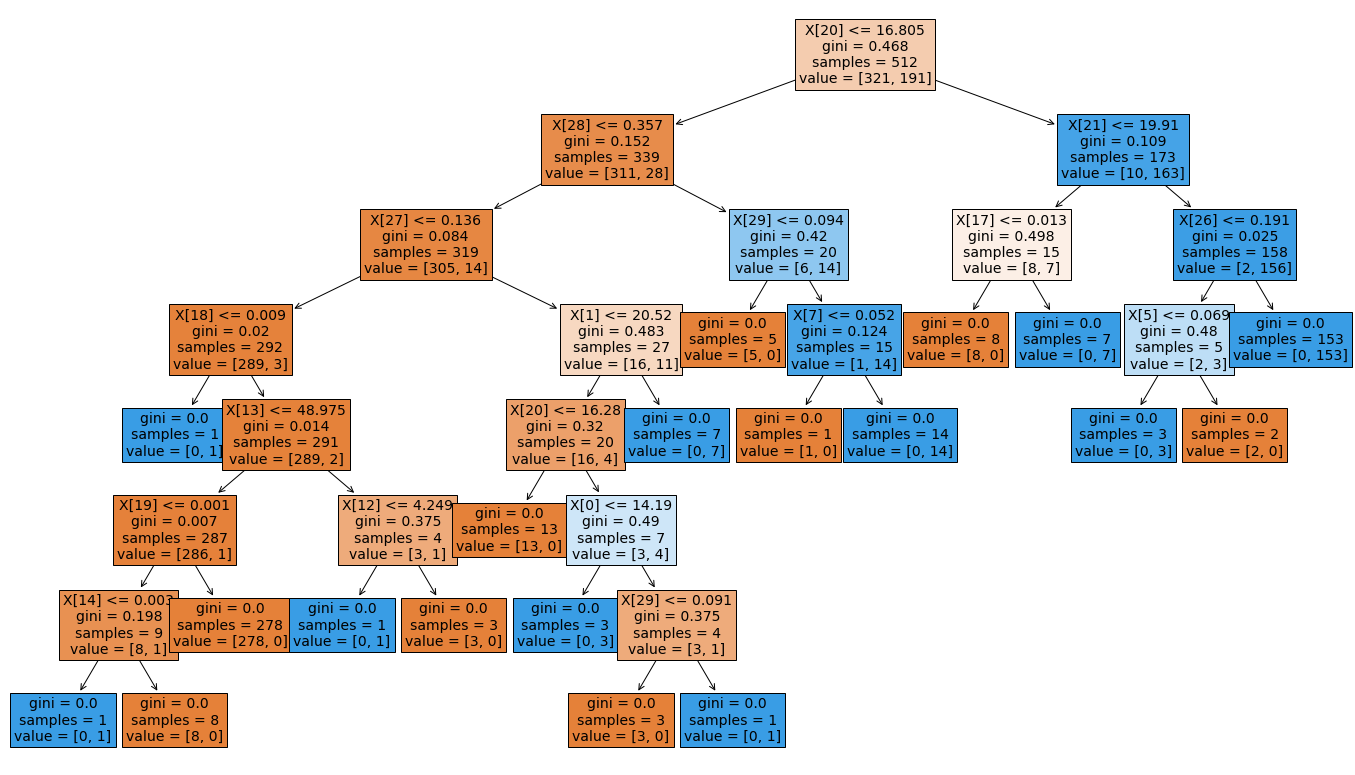

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,14))
from sklearn import tree
tree.plot_tree(model, filled=True, fontsize=14)

### Remember in tree diagram I've noticed that misclassifications are for those who have higher Ginni value like : 0.4 , 0.3 etc